# Лабораторна робота №5: Кластеризація та вибір остаточного розбиття

### Мета роботи
Ознайомитися з базовими методами кластеризації, навчитися обирати оптимальне число кластерів.

In [1]:
import pandas as pd
import numpy as np

### 1. Завантаження даних
Завантажте файл набору даних `data.csv` з Google Classroom.

In [2]:
data = pd.read_csv('data.csv')
test = pd.read_csv('test.csv')

In [3]:
data.head()

,x,y
0,1.559450,0.707068
1,4.359004,3.983718
2,3.083178,3.240837
3,1.650548,0.798074
4,3.601840,2.843760


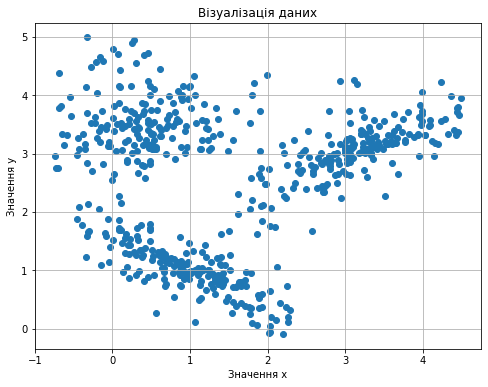

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 6))
plt.scatter(data['x'], data['y'])

plt.xlabel('Значення x')
plt.ylabel('Значення y')
plt.title('Візуалізація даних')

plt.grid(True)

plt.show()

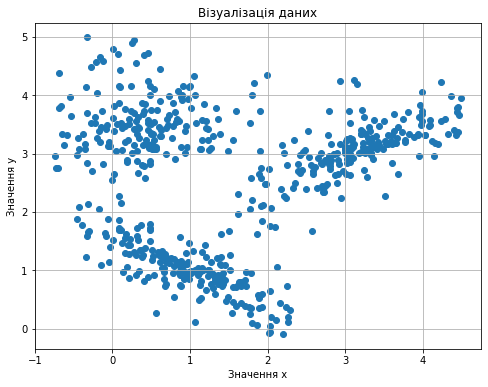

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8, 6))
plt.scatter(test['x'], test['y'])

plt.xlabel('Значення x')
plt.ylabel('Значення y')
plt.title('Візуалізація даних')

plt.grid(True)

plt.show()

### 2. Попередня обробка даних
Нормалізуйте значення у наборі даних.

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numerical_cols_data = ['x', 'y']


scaler.fit(data[numerical_cols_data])
data[numerical_cols_data] = scaler.transform(data[numerical_cols_data])
test[numerical_cols_data] = scaler.transform(test[numerical_cols_data])

print(data.head())



          x         y
0  0.440050  0.157497
1  0.975150  0.802050
2  0.731292  0.655917
3  0.457463  0.175399
4  0.830428  0.577807


### 3. Підрахунок метрик для різної кількості кластерів

Для кількості кластерів у проміжку `[2;10]` виконайте алгоритм кластеризації [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Для результатів з кожної кількості кластерів розрахуйте дві метрики: [сума квадратних відстаней (inertia_)](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) та [оцінку силуету](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html), та відобразіть їх на двох графіках.

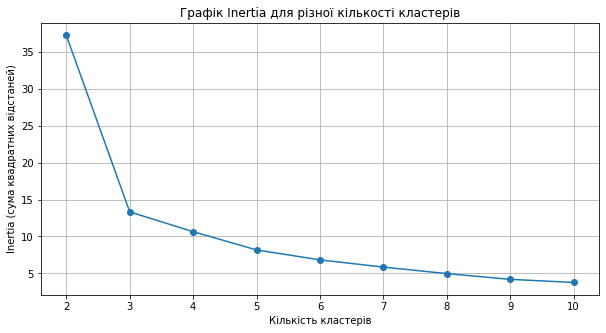

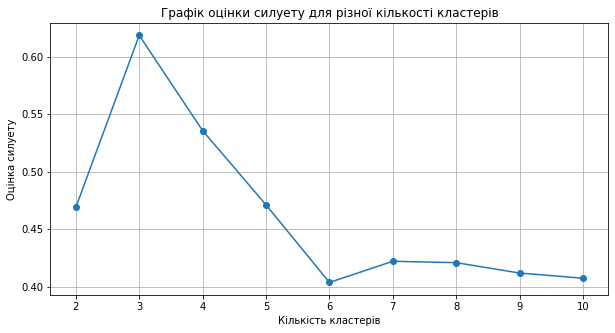

In [7]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

cluster_range = range(2, 11)

inertia_values = []
silhouette_scores = []

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Додано n_init для уникнення попередження
    kmeans.fit(data)

   
    inertia_values.append(kmeans.inertia_)

    silhouette_avg = silhouette_score(data, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# Відображення графіка inertia_
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, inertia_values, marker='o')
plt.title('Графік Inertia для різної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Inertia (сума квадратних відстаней)')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

# Відображення графіка оцінки силуету
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Графік оцінки силуету для різної кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Оцінка силуету')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

### 4. Обирання оптимальної кількості кластерів

За допомогою графіків із завдання 3 візуально оберіть оптимальну кількість кластерів для розбиття.

In [8]:
clusters = 3

### 5. Побудова моделей кластеризації

Навчіть моделі [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), [агломеративної кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) та [Mean Shift](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MeanShift.html) для обраної кількості кластерів.

In [9]:
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
import numpy as np

# 1. KMeans
kmeans_model = KMeans(n_clusters=clusters, random_state=42, n_init=10)
kmeans_model.fit(data)
kmeans_labels_kmeans = kmeans_model.labels_
kmeans_cluster_centers = kmeans_model.cluster_centers_

print(f"Модель KMeans навчена з {clusters} кластерами.")
print("Центри кластерів KMeans:\n", kmeans_cluster_centers)
print("Мітки кластерів KMeans (перші 10):\n", kmeans_labels_kmeans[:10])

# 2. Agglomerative Clustering
agglomerative_model = AgglomerativeClustering(n_clusters=clusters)
agglomerative_model.fit(data)
agglomerative_labels = agglomerative_model.labels_

print(f"\nМодель агломеративної кластеризації навчена з {clusters} кластерами.")
print("Мітки кластерів агломеративної кластеризації (перші 10):\n", agglomerative_labels[:10])

# 3. Mean Shift
mean_shift_model = MeanShift()
mean_shift_model.fit(data)
mean_shift_labels = mean_shift_model.labels_
mean_shift_n_clusters = len(np.unique(mean_shift_labels))

print("\nМодель Mean Shift навчена.")
print(f"Кількість знайдених кластерів Mean Shift: {mean_shift_n_clusters}")
print("Мітки кластерів Mean Shift (перші 10):\n", mean_shift_labels[:10])

Модель KMeans навчена з 3 кластерами.
Центри кластерів KMeans:
 [[0.33937397 0.22443503]
 [0.21484942 0.70784306]
 [0.7508605  0.63091735]]
Мітки кластерів KMeans (перші 10):
 [0 2 2 0 2 2 0 0 0 2]

Модель агломеративної кластеризації навчена з 3 кластерами.
Мітки кластерів агломеративної кластеризації (перші 10):
 [0 1 1 0 1 1 0 0 0 1]

Модель Mean Shift навчена.
Кількість знайдених кластерів Mean Shift: 3
Мітки кластерів Mean Shift (перші 10):
 [0 1 1 0 1 1 0 0 0 1]


### 6. Візуалізація кластерів

Побудуйте точкові діаграми для кожної з моделей кластеризації. Додатково побудуйте ще одну діаграму на основі даних із файлу `test.csv`. Цей файл такий самий, як `data.csv`, але містить додатковий стовпець `c`, що показує справжній клас кожного прикладу.

Порівняйте візуально отримані кластери з діаграмою з `test.csv` і визначте, який метод кластеризації найкраще відтворює реальний розподіл класів.

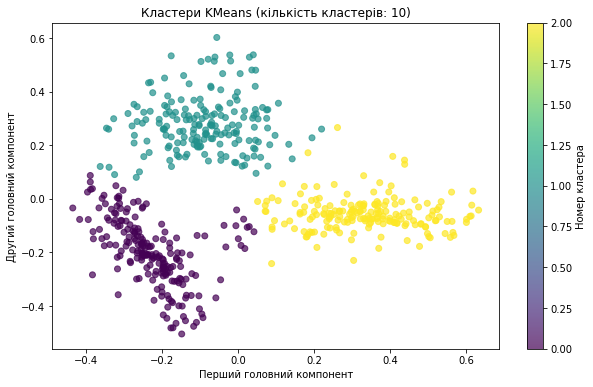

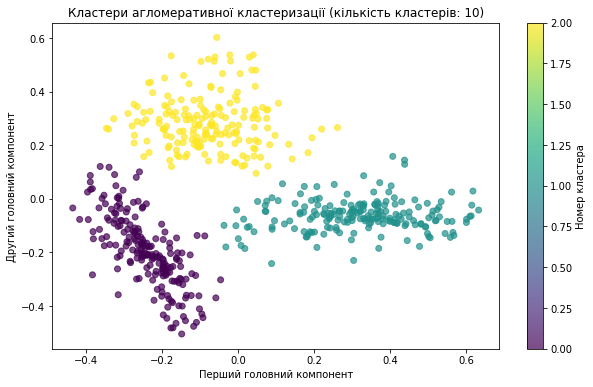

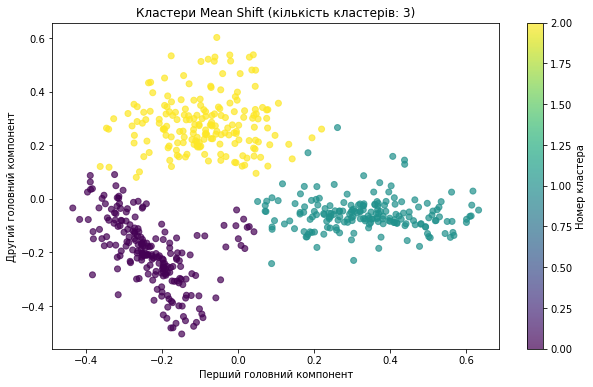

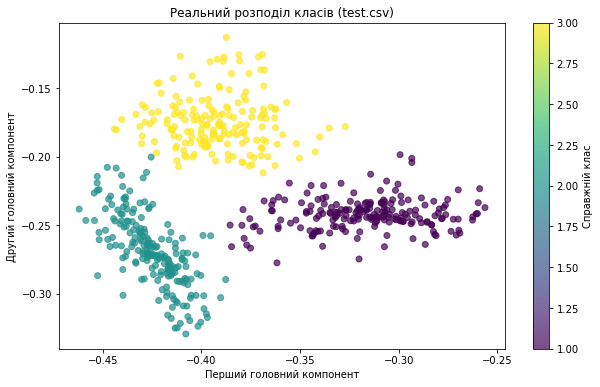

In [12]:
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

# Візуалізація кластерів KMeans
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=kmeans_labels_kmeans, cmap='viridis', alpha=0.7)
plt.title(f'Кластери KMeans (кількість кластерів: {n_clusters})')
plt.xlabel('Перший головний компонент')
plt.ylabel('Другий головний компонент')
plt.colorbar(label='Номер кластера')
plt.show()

# Візуалізація кластерів агломеративної кластеризації
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=agglomerative_labels, cmap='viridis', alpha=0.7)
plt.title(f'Кластери агломеративної кластеризації (кількість кластерів: {n_clusters})')
plt.xlabel('Перший головний компонент')
plt.ylabel('Другий головний компонент')
plt.colorbar(label='Номер кластера')
plt.show()

# Візуалізація кластерів Mean Shift
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=mean_shift_labels, cmap='viridis', alpha=0.7)
plt.title(f'Кластери Mean Shift (кількість кластерів: {mean_shift_n_clusters})')
plt.xlabel('Перший головний компонент')
plt.ylabel('Другий головний компонент')
plt.colorbar(label='Номер кластера')
plt.show()

test_data = test.drop('c', axis=1)

test_data[test_data.select_dtypes(include=['number']).columns] = scaler.transform(test_data[test_data.select_dtypes(include=['number']).columns])
test_data_pca = pca.transform(test_data) # Використовуємо той самий PCA, навчений на тренувальних даних

plt.figure(figsize=(10, 6))
plt.scatter(test_data_pca[:, 0], test_data_pca[:, 1], c=test['c'], cmap='viridis', alpha=0.7)
plt.title('Реальний розподіл класів (test.csv)')
plt.xlabel('Перший головний компонент')
plt.ylabel('Другий головний компонент')
plt.colorbar(label='Справжній клас')
plt.show()